In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

from transmitter import transmitter
from receiver import receiver

In [2]:
def success(a, b):
    """find the percentage difference between two lists"""
    successes = 0

    for index, i in enumerate(a):
        if i == b[index]:
            successes += 1 / len(a)

    return successes

### Transmitter

LDPC Padding Length: 392
OFDM Padding Length: 3296


/Users/maxiyengar/Documents/GF3/GF3/ldpc_jossy/transmitter.py:92: ComplexWarning: Casting complex values to real discards the imaginary part
  to_transmit[index]  = np.concatenate((cyclic_prefix, x), axis = None)


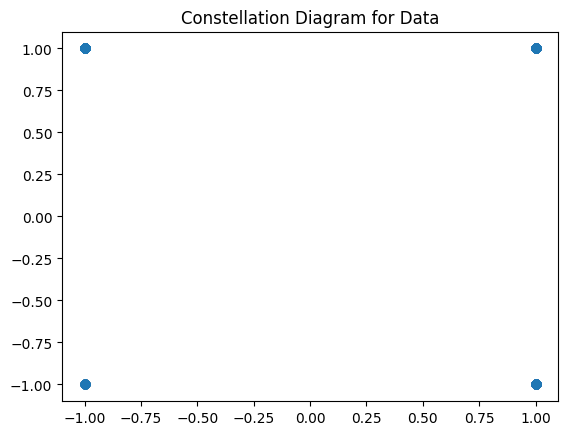

[0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0
 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0]


In [3]:
t = transmitter()

# to_transmit = t.transmit("max_test_in.txt")
# # N.B. I think my gray coding method is v. slow(?)

binary_data = t.process_file("max_test_in.txt")
ldpc_encoded = t.ldpc_encode(binary_data)
to_transmit = t.ofdm(ldpc_encoded)

plt.scatter(t.constellation[0:500].real, t.constellation[0:500].imag)
plt.title("Constellation Diagram for Data")
plt.show()

print(binary_data[0:100])


### Simulated Channel

In [4]:
channel_response = np.loadtxt('../weekend_files/channel.csv', delimiter = ",", dtype = "float")

to_decode = np.convolve(channel_response, to_transmit)

to_decode = to_decode[:-1 * len(channel_response) + 1]

# NOISE

for index, i in enumerate(to_decode):
    to_decode[index] = i + random.gauss(0.0, 0.01)

### Decoder

Star =  (-1.5544390289585117+1.4788522696849449j) . l1, l2 = ((0.8887538152979195+0j), (-0.9341795972150677+0j))
Star =  (1.280003437762246+1.2660204885900141j) . l1, l2 = ((0.7607868114322877+0j), (0.7691895532607471+0j))
Star =  (1.091223639335618+0.9306346196023476j) . l1, l2 = ((0.559111086175319+0j), (0.6555905200580429+0j))
Star =  (-1.074934990826324+2.366873935201375j) . l1, l2 = ((1.4214178486605937+0j), (-0.6455484423509659+0j))
Star =  (-1.212279452993466+0.5477918905643655j) . l1, l2 = ((0.3287918288062454+0j), (-0.7276259200611924+0j))
Star =  (1.0660090610826363-1.473944563800462j) . l1, l2 = ((-0.8840489941190491+0j), (0.6393756327863334+0j))
Star =  (1.1531959033414143+1.0060639745782565j) . l1, l2 = ((0.602894704322054+0j), (0.691065101960219+0j))
Star =  (-1.3843509767527622-0.9472219525339481j) . l1, l2 = ((-0.5670471175405098+0j), (-0.8287310370416159+0j))
Star =  (-1.407132157814604-0.022171368974798017j) . l1, l2 = ((-0.013256905451490083+0j), (-0.8413651856637043

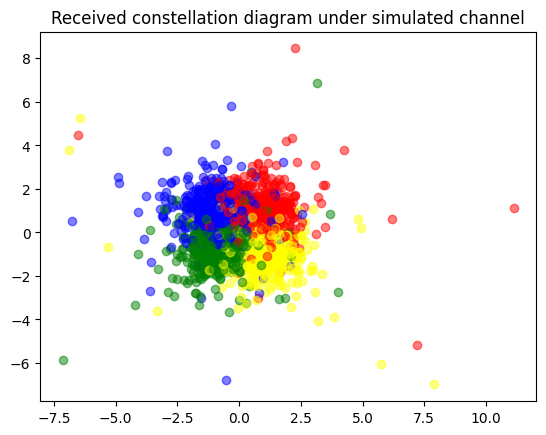

1.8514495013891255
Number of OFDM Blocks:  48
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
Iterations  200
[0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,

In [6]:
r = receiver()

ldpc_coded, llrs = r.ofdm(to_decode) # Again I think the gray coding is quite slow

noise_estimator = []

for index, i in enumerate(r.constellations[0]):

    if np.real(t.constellation[index]) >= 0 and np.imag(t.constellation[index]) >= 0:
        color='red'
        noise_estimator.append(t.constellation[index] - i)
    elif np.real(t.constellation[index]) <= 0 and np.imag(t.constellation[index]) >= 0:
        color='blue'
    elif np.real(t.constellation[index]) <= 0 and np.imag(t.constellation[index]) <= 0:
        color='green'
    elif np.real(t.constellation[index]) >= 0 and np.imag(t.constellation[index]) <= 0:
        color='yellow'

    plt.scatter(i.real, i.imag, color=color, alpha=0.5)

plt.title("Received constellation diagram under simulated channel")
plt.show()

sigma2 = 0
for i in noise_estimator:
    sigma2 += (i.real**2 + i.imag**2) / len(noise_estimator)

print(sigma2)

decoded = r.ldpc_decode(ldpc_coded, llrs)
print(decoded)
text = r.decode_text(decoded)
print(text)

print("Error rate (No LDPC)", success(ldpc_coded, ldpc_encoded))
print("Error rate (w/ LDPC)", success(decoded, binary_data))